In [130]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import collections
from matplotlib import pyplot as plt

In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/jafetl/An-lise-sobre-acidentes-de-transito/main/datatran2021.csv" , encoding = "ISO-8859-1", sep = ';')
df = df.dropna()
pd.options.display.max_columns = None

In [132]:
p = collections.UserDict(df['km'])
brr = []

for key, value in p.items():
    value.replace(',', '.')
    brr.append(value.replace(',','.'))

    
df['km'] = brr
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,314.9,LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Não,3,0,1,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,110.6,TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Curva,Sim,3,0,2,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,45.1,IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Múltipla,Desvio Temporário,Sim,2,0,0,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01


In [134]:
df['mortos'] = df['mortos'].astype(float)
df['km'] = df['km'].astype(float)

In [135]:
input_data = df[['br', 'km']]

In [152]:
kmeans = KMeans(n_clusters=9)

In [153]:
kmeans.fit(input_data)

KMeans(n_clusters=9)

In [154]:
kmeans.labels_

array([0, 3, 4, ..., 4, 4, 4])

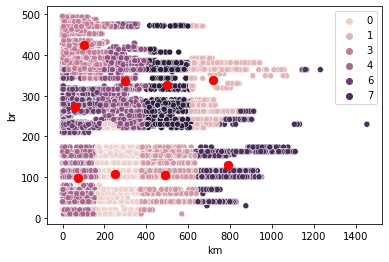

In [155]:
sns.scatterplot(data=input_data, x="km", y="br", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red')

Foi identificado um padrão onde existem uma concentração de acidentes nos primeiros quilômetros 
das rodovias diminuindo conforme vai se aproximando do final pode provar isso tirando a média dos 
quilômetros onde tem 29145 abaixo dos 700 da média e 1666 acima da média.

Uma nova pergunta foi descoberta: Por que existem mais acidentes nos últimos quilômetros das rodovias 